## Descrição do Problema

Quando se trata de trabalhar com dados em um banco é esperado que a concessão de empréstimos seja rigorosamente avaliada com base em argumentos. Um dos problemas dessa empresa em específico era de prever quando uma concessão de empréstimo à um cliente resulta em inadimplência. A inadimplência ocorre quando uma pessoa física ou jurídica deixa de cumprir uma obrigação financeira dentro do prazo estipulado. Com a intenção de sanar este problema, pedimos uma base de dados dos clientes para elaborar uma solução utilizando algoritmos de aprendizagem de máquina.

## Informações do dataset
- **`person_age`**: Idade do cliente
- **`person_income`**: Renda anual do cliente
- **`person_home_ownership`**: tipo de posse da residência (casa alugada, quitada ou em hipoteca)
- **`person_emp_length`**: anos trabalhados dos clientes
- **`loan_intent`**: finalidade do empréstimo
- **`loan_grade`**: grau do empréstimo
- **`loan_int_rate`**: taxa de juros do empréstimo
- **`loan_status`**: variável target dos modelos. 0 = pagou empréstimo 1 = não pagou;
- **`loan_percent_income`**: percentagem do empréstimo dividido pela renda anual do cliente
- **`cb_person_default_on_file`**: se possui histórico de inadimplência
- **`cb_person_cred_hist_length`**: histórico de crédito em anos

Posteriormente trataremos o nome das features e as subcategorias de features categóricas para agilizar a interpretação do banco de dados.

## Importando bibliotecas e dataframe

In [97]:
# para tratamento e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.plotting.backend = 'plotly'
colors = ['darkorange', 'firebrick']
paleta_cores_grande = sns.light_palette('orange', n_colors=15, reverse=True)
paleta_cores_inadimplente = ['firebrick']

# para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# serialização de objetos
import pickle

## Explorando o dataset

In [98]:
# importando o arquivo
df_original = pd.read_csv('credit_risk_dataset.csv')
df = df_original.copy()

In [99]:
# visualizando as primeiras 10 linhas
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [100]:
# exibindo tipos de colunas e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [101]:
# verificando quantidade de únicos por variável
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [102]:
# renomeando as colunas
df.rename(columns={
    'person_age': 'idade_cliente',
    'person_income': 'renda_cliente',
    'person_home_ownership': 'posse_residencia_cliente',
    'person_emp_length': 'tempo_emprego_cliente',
    'loan_intent': 'finalidade_emprestimo',
    'loan_grade': 'nota_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros_emprestimo',
    'loan_status': 'status_emprestimo',
    'loan_percent_income': 'percentual_renda_emprestimo',
    'cb_person_default_on_file': 'historico_inadimplencia_cliente',
    'cb_person_cred_hist_length': 'tempo_credito_cliente'
}, inplace=True)

Substituimos os nomes das colunas para facilitar o entendimento

In [103]:
# colunas do dataset
df.columns

Index(['idade_cliente', 'renda_cliente', 'posse_residencia_cliente',
       'tempo_emprego_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'valor_emprestimo', 'taxa_juros_emprestimo', 'status_emprestimo',
       'percentual_renda_emprestimo', 'historico_inadimplencia_cliente',
       'tempo_credito_cliente'],
      dtype='object')

In [104]:
# renomeando as subcategorias da feature finalidade_emprestimo
df['finalidade_emprestimo'].replace({
    'DEBTCONSOLIDATION': 'Consolidação de Dívidas',
    'EDUCATION': 'Educação',
    'HOMEIMPROVEMENT': 'Melhoria da Casa',
    'MEDICAL': 'Médico',
    'PERSONAL': 'Pessoal',
    'VENTURE': 'Empreendimento'
}, inplace=True)

Traduzimos os motivos que originam os empréstimos.

In [105]:
# renomeando as subcategorias da feature posse_residencia_cliente
df['posse_residencia_cliente'].replace({
    'MORTGAGE': 'Hipoteca',
    'OTHER': 'Outro',
    'OWN': 'Própria',
    'RENT': 'Alugada'
}, inplace=True)

Renomeamos os tipos de posses das moradias dos clientes.

In [106]:
# dimensões do dataframe
df.shape

(32581, 12)

In [107]:
# exibindo estatísticas descritivas das features numéricas
df.describe()

,idade_cliente,renda_cliente,tempo_emprego_cliente,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,tempo_credito_cliente
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Com esta primeira exploração do dataset, é possível visualizar que:
- `df.shape`: O dataset engloba 32.581 linhas e 12 colunas
- `valor_emprestimo`: A média do valor dos empréstimos está em torno de 9.600 com desvio padrão de 6.300.
- `renda_cliente`: A renda dos clientes vai de 4 mil até 6 milhões, existem possíveis outliers.
- `percentual_renda_emprestimo`: O percentual do empréstimo sobre a renda possui valores mínimos iguais a zero, o que não é possível, visto que não há clientes com renda igual a zero. Isto significa que os percentuais mínimos do empréstimo sobre a renda devem ser verificados e tratados.
- `idade_cliente`: A feature idade possui outliers de clientes com 144 anos, respectivamente, um possível erro de entrada de dados.
- `tempo_emprego_cliente`: O tempo empregatício registrado dos clientes possui um outlier de 123 anos empregado, será tratado posteriormente.
- `.isnull().sum()`: Há dados nulos em `taxa_juros_emprestimo` e `tempo_emprego_cliente`, trataremos mais à frente.
- Existem:
    - 3 colunas em formato float64
    - 5 colunas em formato int64
    - 4 colunas em formato object (strings)
    - O dataset utiliza 3.0 MB de memória, podemos reduzir isto alterando os tipos das colunas numéricas conforme abaixo:

In [108]:
print(f"{df['tempo_emprego_cliente'].isnull().sum()} dados nulos na variável: 'tempo_emprego_cliente'")
print(f"{df['taxa_juros_emprestimo'].isnull().sum()} dados nulos na variável: 'taxa_juros_empréstimo'")

895 dados nulos na variável: 'tempo_emprego_cliente'
3116 dados nulos na variável: 'taxa_juros_empréstimo'


Sabemos agora que os dados nulos representam:
- 895 clientes sem informação de tempo de serviço (`tempo_emprego_cliente`); e
- 3116 clientes sem informação de taxa de juros (`taxa_juros_emprestimo`).

Devemos tratá-los e após isso podemos alterar os tipos das colunas numéricas.
- Poderíamos inserir um valor .fillna(-1) e verificar depois a distribuição da taxa de juros mais a fundo para preencher com a média ou moda, contudo, essa variável em particular é muito importante para ser tratada desta forma, não iremos arriscar incluir um viés nos dados que poderia incidir em um modelo de Machine Learning com underfitting devido ao preenchimento de 3 mil instâncias com média ou moda. Decidimos por excluir todas as 3.116 instâncias do dataset.

In [109]:
# preenchemos taxa_emprego_cliente com o valor mais frequente
df['tempo_emprego_cliente'].fillna(df['tempo_emprego_cliente'].mode()[0], inplace=True)

# removemos os valores nulos e transformamos o tipo de taxa_juros_emprestimo por se tratar de uma variável de importante interpretação.
df['taxa_juros_emprestimo'] = df['taxa_juros_emprestimo'].replace({" ": np.nan}).fillna(-1).astype('float32')
df.drop(df[df['taxa_juros_emprestimo'] == -1].index, inplace=True)
df.reset_index(drop=True, inplace=True) # resetamos o index para não ir até 32580, mas sim até 29464

print(f"{df['tempo_emprego_cliente'].isnull().sum()} dados nulos após tratamento na variável numérica: tempo_emprego_cliente")
print(f"{df['taxa_juros_emprestimo'].isnull().sum()} dados nulos após tratamento na variável numérica: taxa_juros_empréstimo")
print(f"Restaram {df.shape[0]} linhas no dataset")

0 dados nulos após tratamento na variável numérica: tempo_emprego_cliente
0 dados nulos após tratamento na variável numérica: taxa_juros_empréstimo
Restaram 29465 linhas no dataset


Retiramos os valores nulos para não interferir na transformação de tipo de dados, faremos a transformação de mais algumas variáveis também:

In [110]:
# Convertendo historico_inadimplencia_cliente de object para int8, transformando "Y" e "N" para 1 e 0, respectivamente.
df['historico_inadimplencia_cliente'] = df['historico_inadimplencia_cliente'].replace({"Y": 1, "N": 0}).astype('int16')

# Convertendo status_emprestimo, idade_cliente e tempo_credito_cliente de int64 para int16
df['status_emprestimo'] = df['status_emprestimo'].replace({" ": np.nan}).fillna(0).astype('int16')
df['idade_cliente'] = df['idade_cliente'].replace({" ": np.nan}).fillna(0).astype('int16')
df['tempo_credito_cliente'] = df['tempo_credito_cliente'].replace({" ": np.nan}).fillna(0).astype('int16')

# Convertendo tempo_emprego_cliente de float64 para int16
df['tempo_emprego_cliente'] = df['tempo_emprego_cliente'].replace({" ": np.nan}).astype('int16')

# Convertendo percentual_renda_emprestimo de float64 para float32, evitando perder informações
df['percentual_renda_emprestimo'] = df['percentual_renda_emprestimo'].replace({" ": np.nan}).astype('float32')

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29465 entries, 0 to 29464
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idade_cliente                    29465 non-null  int16  
 1   renda_cliente                    29465 non-null  int64  
 2   posse_residencia_cliente         29465 non-null  object 
 3   tempo_emprego_cliente            29465 non-null  int16  
 4   finalidade_emprestimo            29465 non-null  object 
 5   nota_emprestimo                  29465 non-null  object 
 6   valor_emprestimo                 29465 non-null  int64  
 7   taxa_juros_emprestimo            29465 non-null  float32
 8   status_emprestimo                29465 non-null  int16  
 9   percentual_renda_emprestimo      29465 non-null  float32
 10  historico_inadimplencia_cliente  29465 non-null  int16  
 11  tempo_credito_cliente            29465 non-null  int16  
dtypes: float32(2), int

,idade_cliente,renda_cliente,tempo_emprego_cliente,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente
count,29465.000000,2.946500e+04,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000
mean,27.714712,6.602047e+04,4.654268,9584.744612,11.011695,0.219379,0.170110,0.176922,5.788257
std,6.300193,6.190142e+04,4.171572,6316.272282,3.240459,0.413833,0.106879,0.381609,4.031987
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.219999,1.000000,0.830000,1.000000,30.000000


In [111]:
# comparamos com o original para verificar se houve perda de informação ao transformar tipos de dados
df_original.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- No caso de `taxa_juros_emprestimo`, os dados nulos foram removidos e isso não altera nem a média nem o desvio padrão dela, mas de outras features, sim. Reduziu bem levemente de todas das features.
- No caso de `tempo_emprego_cliente`, os dados nulos foram preenchidos com o valor mais frequente, é esperado que a média e o desvio padrão diminuam um pouco.
- É esperado também que quando tratarmos os outliers de outras variáveis, assim como `tempo_emprego_cliente` e `idade_cliente`, a média e desvio padrão deles sofram alterações.

Conseguimos reduzir em **1.4 MB o uso de memória** comparando com o dataset original tratando dados e transformando tipos de features. Para efeitos de EDA (Análise Exploratória de Dados) e posterior modelagem, trata-se de uma etapa importante em grandes bases de dados. Ao final da EDA reduziremos um pouco mais devido à encoding de features categóricas no momento de aplicar alguns modelos de Machine Learning.

# Análise Exploratória de Dados

In [112]:
# reposicionando o target
columns = [col for col in df.columns if col != 'status_emprestimo'] + ['status_emprestimo']
df = df[columns]
df.columns

Index(['idade_cliente', 'renda_cliente', 'posse_residencia_cliente',
       'tempo_emprego_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'valor_emprestimo', 'taxa_juros_emprestimo',
       'percentual_renda_emprestimo', 'historico_inadimplencia_cliente',
       'tempo_credito_cliente', 'status_emprestimo'],
      dtype='object')

Reposicionamos a variável target como sendo a última para facilitar a divisão em treino e teste futuramente.

### Análise Univariada

##### Variáveis numéricas

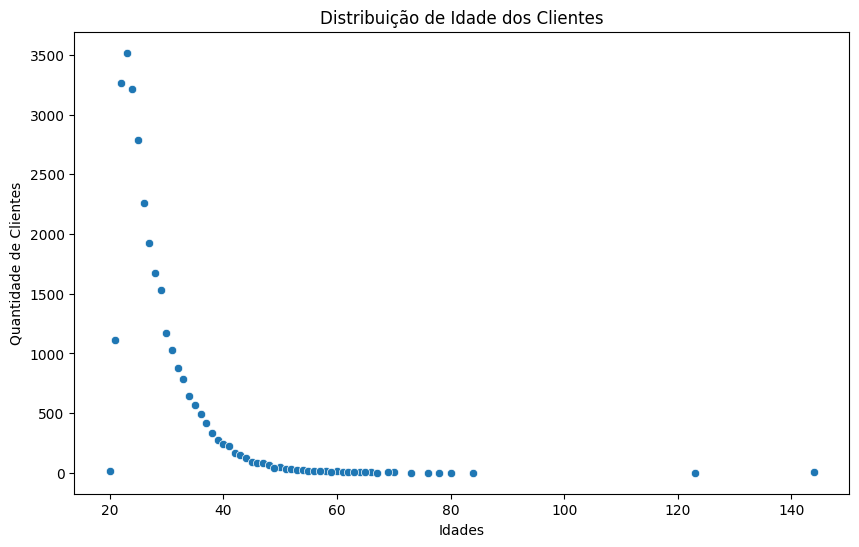

In [113]:
idades = df['idade_cliente'].value_counts().index
quantidades = df['idade_cliente'].value_counts().values

# Plotar com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=idades, y=quantidades, palette=colors)

# Configurações do gráfico
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Clientes')

plt.show()

- O scatter plot mostra que há clientes com 123 anos e clientes com 144 anos.
- O maior grupo de clientes possui 23 anos com mais de 3.500 instâncias.
- A população do dataset é composta majoritariamente por jovens e adultos entre 21 e 35 anos.

In [114]:
# Visualizando os clientes que possuem idades maiores que o cliente mais idoso: 94 anos.
df[df['idade_cliente'] > 94]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
74,144,250000,Alugada,4,Empreendimento,C,4800,13.57,0.02,0,3,0
164,144,200000,Hipoteca,4,Educação,B,6000,11.86,0.03,0,2,0
516,123,80004,Alugada,2,Educação,B,20400,10.25,0.25,0,3,0
29211,144,6000000,Hipoteca,12,Pessoal,C,5000,12.73,0.00,0,25,0


Confirmamos que as idades '123' e '144' anos identificadas possuem mais de uma instância cada no dataset. Isso pode ocorrer por erro humano no preenchimento de dados. Neste caso poderiamos remover estes clientes do dataset ou simplesmente tratar as idades. Com base nisso:
- Somente clientes maiores de idade podem solicitar um empréstimo, então os mesmos não poderiam ter '14' e '12' anos, dado que o cliente com a menor idade do dataframe tem 20 anos.
- Neste caso, assumimos que os clientes possuem '23' e '44' anos, respectivamente.
    - Clientes com 23 anos de idade possuem representação majoritária no dataset.
    - Há 141 clientes com 44 anos no dataset.

In [115]:
# Tratamos
df[df['idade_cliente'] == 144] = df[df['idade_cliente'] == 144 ].replace({144: 44})
df[df['idade_cliente'] == 123] = df[df['idade_cliente'] == 123 ].replace({123: 23})

# Verificamos se há outliers após o tratamento
df[df['idade_cliente'] > 94]


,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo


O tratamento foi um sucesso e podemos também visualizar que antes do tratamento, o último cliente que possuía uma idade de 144 anos, recebe uma renda anual de 6 milhões. O que é totalmente possível, mas deve ser verificado dentro do nosso contexto se é um outlier ou não. 

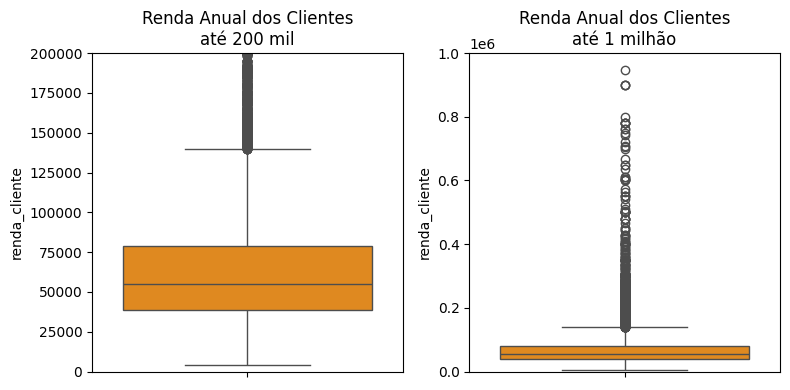

In [116]:
# Cria a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Primeiro boxplot (renda até 200 mil)
sns.boxplot(y='renda_cliente', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Renda Anual dos Clientes\naté 200 mil')
axes[0].set_ylim(0, 200000)

# Segundo boxplot (renda até 6 milhões)
sns.boxplot(y='renda_cliente', data=df, palette=colors, ax=axes[1])
axes[1].set_title('Renda Anual dos Clientes\naté 1 milhão')
axes[1].set_ylim(0, 1000000)

# Mostra a figura
plt.tight_layout()
plt.show()

In [117]:
print(f'Quantidade de clientes que recebem MENOS que 135 mil: ' + str(df[df['renda_cliente'] < 135000].shape[0]))
print(f'Quantidade de clientes que recebem entre 135 e 500 mil: ' + str(df[df['renda_cliente'] < 500000].shape[0] - df[df['renda_cliente'] < 135000].shape[0]))
print(f'Quantidade de clientes que recebem entre 500 mil e 1 milhão: ' + str(df[df['renda_cliente'] < 1000000].shape[0] - df[df['renda_cliente'] < 500000].shape[0]))
print(f'Quantidade de clientes que recebem acima de 1 milhão: ' + str(df[df['renda_cliente'] >= 1000000].shape[0]))

Quantidade de clientes que recebem MENOS que 135 mil: 27848
Quantidade de clientes que recebem entre 135 e 500 mil: 1567
Quantidade de clientes que recebem entre 500 mil e 1 milhão: 43
Quantidade de clientes que recebem acima de 1 milhão: 7


In [118]:
# retirando as instâncias consideradas outliers
df.drop(df[df['renda_cliente'] >= 500000].index, inplace=True)
print(f"A média da renda anual caiu de {df_original['person_income'].mean():.2f} para {df['renda_cliente'].mean():.2f}")
print(f"O desvio padrão da renda anual caiu de {df_original['person_income'].std():.2f} para {df['renda_cliente'].std():.2f}")


A média da renda anual caiu de 66074.85 para 64656.72
O desvio padrão da renda anual caiu de 61983.12 para 40728.53


Conclusão inicial sobre a renda:
- O IQR (intervalo interquartil) representa uma caixa pequena, significa que os outliers representam minoria no dataset, sendo as rendas acima de 135 mil consideradas como outliers pelo boxplot.
- Não é interessante retirarmos todos estes valores considerados outliers pelo gráfico box plot pois além de perder muita informação do dataset, podemos desenvolver um modelo que não possui uma boa performance na generalização de dados.
- Entendemos que principalmente os 50 clientes que recebem mais que 500 mil são os mesmos puxam o desvio padrão da renda anual exageradamente para cima.
- Dessa forma, dependendo do modelo de machine learning a ser utilizado, podemos decidir por manter somente os clientes que recebem entre 500 mil ou menos por ano, assim retirando 50 instâncias e diminuindo a média em aproximadamente 2.600 e o desvio padrão em aproximadamente 21 mil da feature `renda_cliente`.

In [119]:
# Tratando os outliers da feature de contagem dos anos trabalhados de clientes
df[df['tempo_emprego_cliente'] > 40]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
0,22,59000,Alugada,123,Pessoal,D,35000,16.02,0.59,1,3,1
187,21,192000,Hipoteca,123,Empreendimento,A,20000,6.54,0.10,0,4,0
29264,78,48000,Alugada,41,Médico,A,3000,7.51,0.06,0,25,0


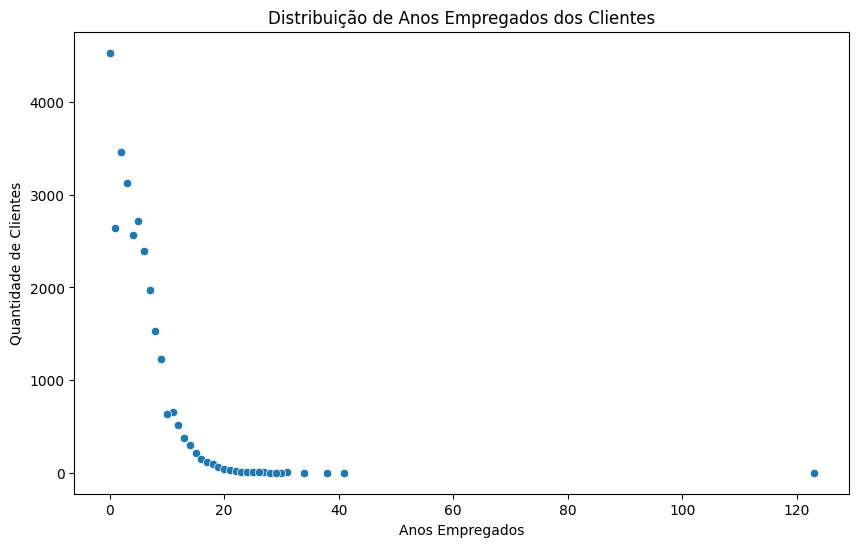

In [120]:
# Calcular as contagens de tempo_emprego_cliente
anos_empregados = df['tempo_emprego_cliente'].value_counts().index
quantidades = df['tempo_emprego_cliente'].value_counts().values

# Plotando com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=anos_empregados, y=quantidades, palette=colors)
plt.title('Distribuição de Anos Empregados dos Clientes')
plt.xlabel('Anos Empregados')
plt.ylabel('Quantidade de Clientes')

plt.show()

In [121]:
count = df[(df['tempo_emprego_cliente'] >= 20) & (df['tempo_emprego_cliente'] <= 25)].shape[0]
print(f"Quantidade de anos trabalhados registrados entre 20 e 25 anos: {count} clientes.")

Quantidade de anos trabalhados registrados entre 20 e 25 anos: 113 clientes.


- `tempo_emprego_cliente`: Há dois clientes com registros de 123 anos empregados, serão tratados como "23 anos empregados".
- Verificamos quantos clientes possuem em torno de 23 anos antes de tratar desta forma; e
- Possuimos 113 clientes na base de dados entre 20 e 25 anos trabalhados, portanto, é totalmente plausível substituir por este valor comum do nosso banco de dados.

In [122]:
# substituimos
df[df['tempo_emprego_cliente'] > 41] = df[df['tempo_emprego_cliente'] > 41].replace({123: 23})
# verificamos a alteração
df[df['tempo_emprego_cliente'] > 41]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo


Substituimos com sucesso os registros de anos trabalhados considerados como outliers.

In [123]:
# verificamos os valores nulos
df[df['percentual_renda_emprestimo'] <= 0.0]
df.describe()

,idade_cliente,renda_cliente,tempo_emprego_cliente,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
count,29415.000000,29415.000000,29415.000000,29415.000000,29415.000000,29415.000000,29415.000000,29415.000000,29415.000000
mean,27.682339,64656.715927,4.642495,9577.810641,11.011504,0.170365,0.176747,5.776475,0.219582
std,6.145113,40728.525168,4.054134,6308.646835,3.241405,0.106788,0.381461,4.017324,0.413970
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,0.000000,2.000000,0.000000
25%,23.000000,38489.000000,2.000000,5000.000000,7.900000,0.090000,0.000000,3.000000,0.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,0.000000,4.000000,0.000000
75%,30.000000,79000.000000,7.000000,12212.500000,13.470000,0.230000,0.000000,8.000000,0.000000
max,84.000000,499800.000000,41.000000,35000.000000,23.219999,0.830000,1.000000,30.000000,1.000000


**`percentual_renda_emprestimo`**: Os clientes com 0% de empréstimo sobre a renda foram retirados do dataframe quando retiramos as instâncias nulas de `taxa_juros_emprestimo`

In [124]:
# definimos as features numericas e as categoricas para facilitar a EDA
features_numericas = df.nunique()[df.nunique() > 7].index
features_categoricas = df.nunique()[df.nunique() <= 7].index[:-1]
print(features_numericas)
print(features_categoricas)

Index(['idade_cliente', 'renda_cliente', 'tempo_emprego_cliente',
       'valor_emprestimo', 'taxa_juros_emprestimo',
       'percentual_renda_emprestimo', 'tempo_credito_cliente'],
      dtype='object')
Index(['posse_residencia_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'historico_inadimplencia_cliente'],
      dtype='object')


Defini que para efeitos de análise, as variáveis categóricas serão aquelas com 7 ou menos valores únicos dentro da mesma feature. Utilizaremos daqui a pouco para facilitar a visualização dos dados.

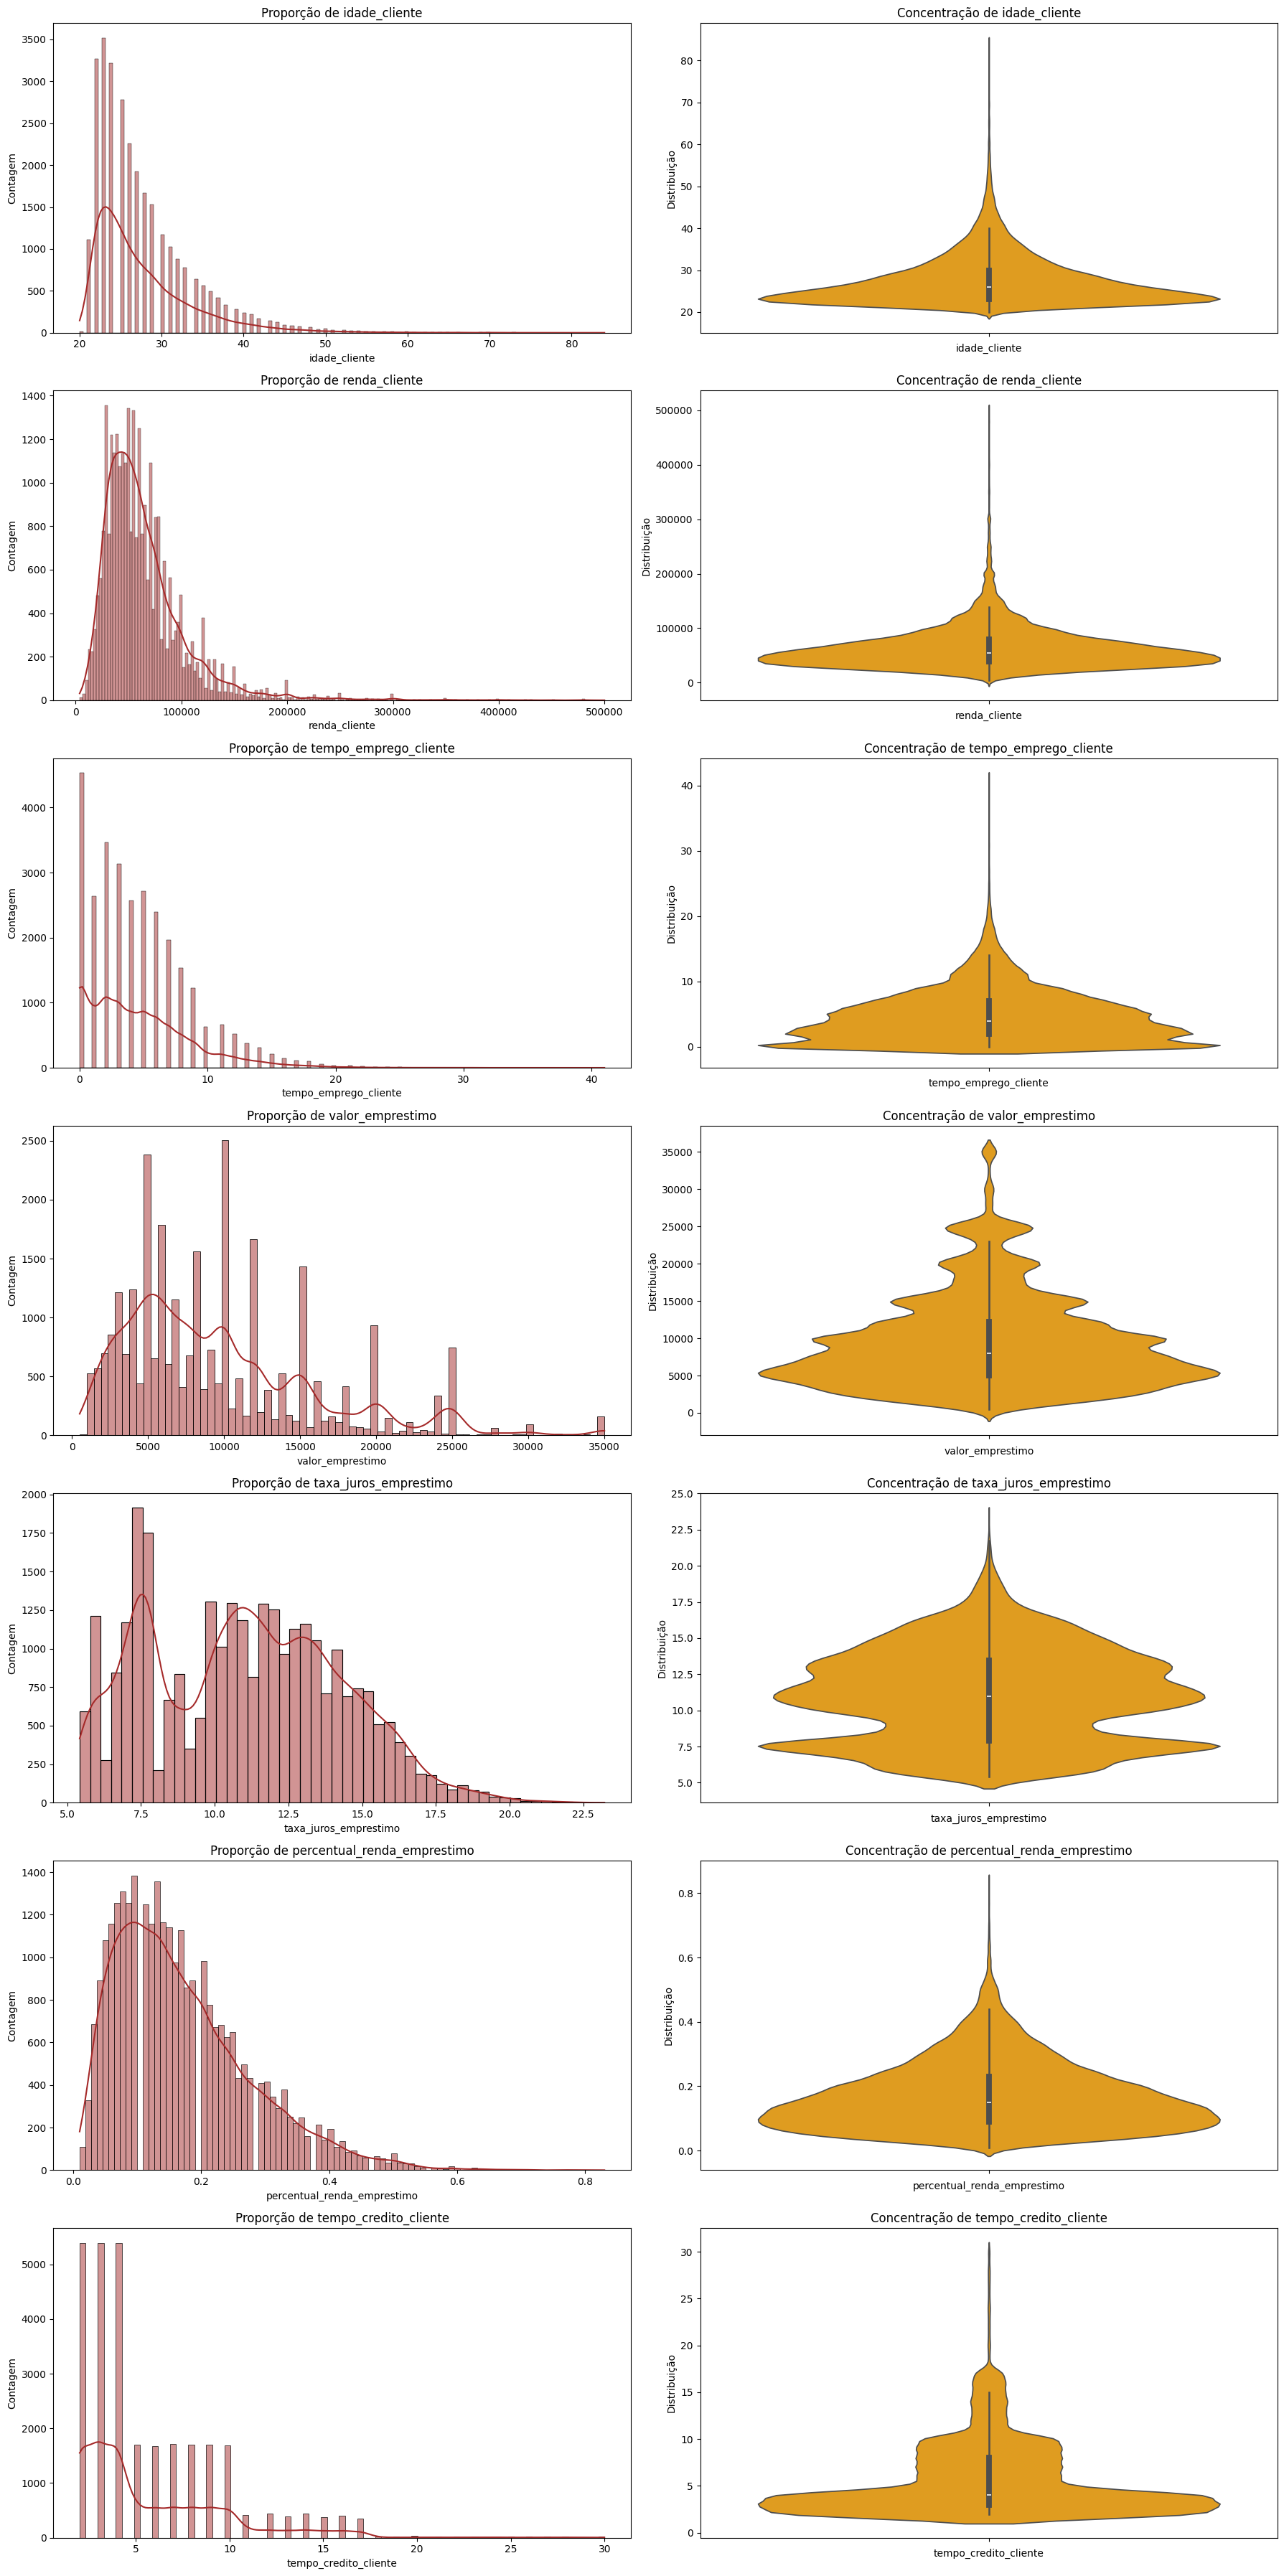

In [125]:
# criando uma figura com 7 linhas e 2 colunas
fig, axes = plt.subplots(7, 2, figsize=(18, 36))

# iterando sob as features numericas e plota um histograma e gráfico de violino
for i, feature in enumerate(features_numericas): # features_numericas[2:]
    # definindo a posição da subplot
    row = i
    col_0plot, col_1plot = 0, 1 #  col_2plot = 2
    
    # histogramas
    sns.histplot(data=df[feature], color='brown', ax=axes[row, col_0plot], kde=True);
    title_histplot = 'Proporção de ' + feature
    axes[row, col_0plot].set_title(title_histplot)
    axes[row, col_0plot].set_ylabel('Contagem')
    axes[row, col_0plot].set_xlabel(feature)
    
    # gráficos de violino
    sns.violinplot(y=df[feature], ax=axes[i, col_1plot], inner='box', palette=paleta_cores_grande);
    title_violinplot = 'Concentração de ' + feature
    axes[row, col_1plot].set_title(title_violinplot)
    axes[row, col_1plot].set_ylabel('Distribuição')
    axes[row, col_1plot].set_xlabel(feature)

# exibindo os gráficos
plt.tight_layout()
plt.show();

Podemos concluir com base nos gráficos:
- Todas as features envolvidas possuem uma **assimetria positiva, uma cauda à direita**.
- O **gráfico KDE (Kernel Density Estimate)** imbutido no histograma mostra a curva das variáveis contínuas mais suavizadas mostrando que é uma medida mais eficiente da comparação entre valores que devemos nos aprofundar posteriormente. Ele demonstra uma grande diferença das curvas se comparado com os gráficos de violino.
- **`idade_cliente`**: A população do dataset é composta majoritariamente por jovens e adultos entre 21 e 35 anos.
    - O maior grupo de clientes possui 23 anos com 3889 instâncias.
- **`renda_cliente`**: Como vimos anteriormente, a quantidade de clientes que recebem MENOS que 135 mil por ano é o grupo predominante com 27.848 instâncias.
    - Enquanto os que recebem entre 135 a 500 mil são aproximadamente 1530 clientes.
- **`tempo_emprego_cliente`**: A maior concentração de tempo empregatício que se encontra em `emprego_tempo_cliente` está entre 0 e 10 anos.
    - O valor máximo está em 40 anos, o que é plausível pensando no caso do Brasil em que dependendo do ramo trabalhado, uma pessoa se aposenta com direito à aposentadoria com 35 anos de serviço. O que nos leva a assumir que não há outliers neste contexto.
- **`valor_emprestimo`**: Os valores de empréstimos se concentram aproximadamente entre 2 mil e 15 mil. O maior valor de empréstimo fornecido é de 35000 para poucos clientes e não há outliers.
- **`taxa_juros_emprestimo`**: A concentração de dados está em 7,5% e entre 10% a 15% de juros anual.
    - A taxa de juros do empréstimo mostra que há pelo menos um cliente com 23% de juros ao ano, que é a maior taxa.
    - A escala relativa de tempo não é conhecida, mas presumimos que está em anos.
- **`percentual_renda_emprestimo`**: A concentração dos dados se encontra entre 1% e 30%; e
    - É possível visualizar que não há mais uma quantia considerável de clientes dentro da faixa de 0%. 
- **`tempo_credito_cliente`**: Metade do dataset está entre 0 e 5 anos e 1/3 do dataset está entre 5 e 10 anos de tempo de crédito do cliente.
    - O valor máximo está em aproximadamente 30 anos. Assumimos que não há outliers neste contexto.
    - Não sabemos a escala relativa de tempo, mas supomos que está em anos.

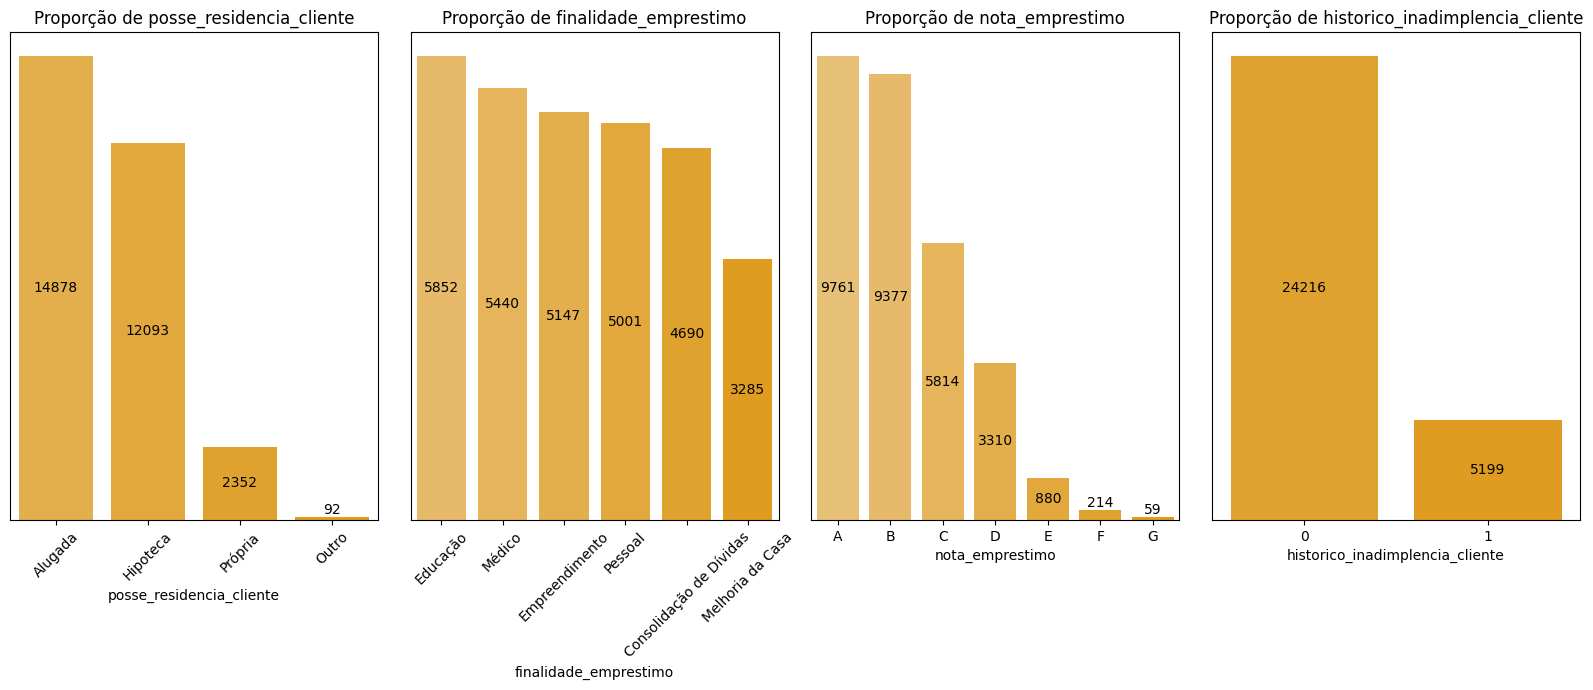

In [126]:
# criando uma figura com 1 linha e 4 colunas
fig, ax = plt.subplots(1, 4, figsize=(16,7))

# iterando sob as features categóricas e plotando um gráfico de barras
for k in range(len(features_categoricas)):
    plt.subplot(1, 4, k+1)
    # definindo iteráveis
    feature = features_categoricas[k]
    x = df[feature].value_counts().index
    y = df[feature].value_counts().values
    # criando o gráfico de barras
    bars = sns.barplot(x=x, y=y, hue=y, palette=paleta_cores_grande, legend=False)
    # retirando informações do eixo Y
    plt.yticks([])
    plt.ylabel('')
    plt.title(f"Proporção de {feature}", fontsize=5)
    # rotacionando rótulos grandes
    if feature in ['posse_residencia_cliente', 'finalidade_emprestimo']:
        plt.xticks(rotation=45)

    # adicionando rótulos nas barras
    for i in range(len(x)):
        if y[i] < 500:
            plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=10, color='black')
        else:
            plt.text(i, y[i] / 2, str(y[i]), ha='center', va='center', fontsize=10, color='black')
        
    # exibindo a figura
    plt.tight_layout()
    plt.title("Proporção de " + feature)

In [127]:
# Contagem de clientes com histórico de inadimplência bom e ruim
hist_cred_bom = df[df['historico_inadimplencia_cliente'] == 0].shape[0]
hist_cred_ruim = df[df['historico_inadimplencia_cliente'] == 1].shape[0]

# cálculo da porcentagem e proporção de clientes com histórico de crédito ruim em relação ao total
percent_cred_ruim = (hist_cred_ruim / (hist_cred_bom + hist_cred_ruim)) * 100
proporcao_cred = df['historico_inadimplencia_cliente'].value_counts()[0]/df['historico_inadimplencia_cliente'].value_counts()[1]

# exibindo porcentagem e proporção
print(f'{hist_cred_ruim} clientes com história de crédito ruim correspondem a {percent_cred_ruim:.2f}% do total de clientes.\nCom uma proporção de {proporcao_cred:.2f}, aproximadamente {round(proporcao_cred)}:1.')

5199 clientes com história de crédito ruim correspondem a 17.67% do total de clientes.
Com uma proporção de 4.66, aproximadamente 5:1.


Das variáveis categóricas, podemos concluir inicialmente que:
- Todas as variáveis possuem uma cauda à direita.
- **`posse_residencia_cliente`**: A maioria dos clientes alugam moradias e possuem hipoteca.
- **`finalidade_emprestimo`**:  finalidade dos empréstimos possui uma leve assimetria positiva, sendo os três maiores motivos de solicitar empréstimo: Educação, Médico e Empreendimento.
- **`nota_emprestimo`**: As notas de empréstimos mais presentes no dataframe são do tipo "A", "B" e "C".
- **`historico_inadimplencia_cliente`**: podemos visualizar um desbalanceamento dos dados exibindo **5.199** clientes (21.47%) com histórico de crédito ruim sendo minoria, é uma minoria com uma proporção de **a cada 5 clientes um possui histórico de inadimplência.**

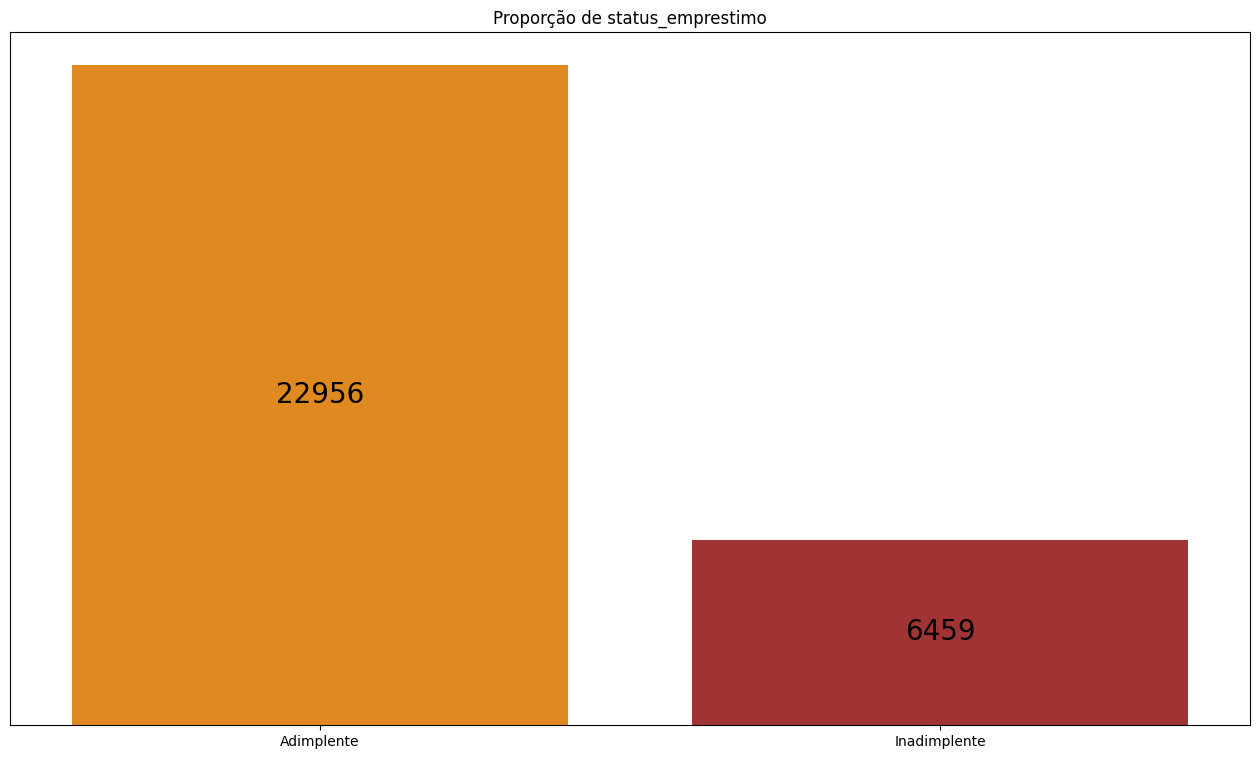

In [128]:
# Analisando o target 'status_emprestimo' no gráfico de barras
plt.figure(figsize=(16,9))
target_value_counts = df['status_emprestimo'].value_counts()
sns.barplot(x=['Adimplente','Inadimplente'], y=target_value_counts.values, palette=colors)
plt.title('Proporção de status_emprestimo')
# retirando rótulos do eixo Y
plt.ylabel('')
plt.yticks([])
# acrescentando rótulo dentro das barras
for i in range(len(x)):
    plt.text(i, target_value_counts.values[i] / 2, str(target_value_counts.values[i]), ha='center', va='center', fontsize=20, color='black')
# exibindo a figura
plt.show();

In [129]:
# contagem de adimplentes e inadimplentes
status_nao_inadimplente = df[df['status_emprestimo'] == 0].shape[0]
status_inadimplente = df[df['status_emprestimo'] == 1].shape[0]

# porcentagem e proporção de inadimplentes
percent_status_inadimplente = (status_inadimplente / (status_nao_inadimplente + status_inadimplente))*100
proporcao = df['status_emprestimo'].value_counts()[0]/df['status_emprestimo'].value_counts()[1]

# exibindo porcentagem e proporção
print(f'{status_inadimplente} clientes inadimplentes correspondem a {percent_status_inadimplente:.2f}% do total de clientes.\nCom uma proporção de {proporcao:.2f}, aproximadamente {round(proporcao)}:1.')

6459 clientes inadimplentes correspondem a 21.96% do total de clientes.
Com uma proporção de 3.55, aproximadamente 4:1.


- **`status_emprestimo`**: A variável alvo afirma novamente o desbalanceamento dos dados exibindo **6.459** clientes (21.96%) que estão classificados como inadimplentes com uma proporção de **a cada 4 clientes um é inadimplente.**

### Análise Bivariada

##### Variáveis Numéricas

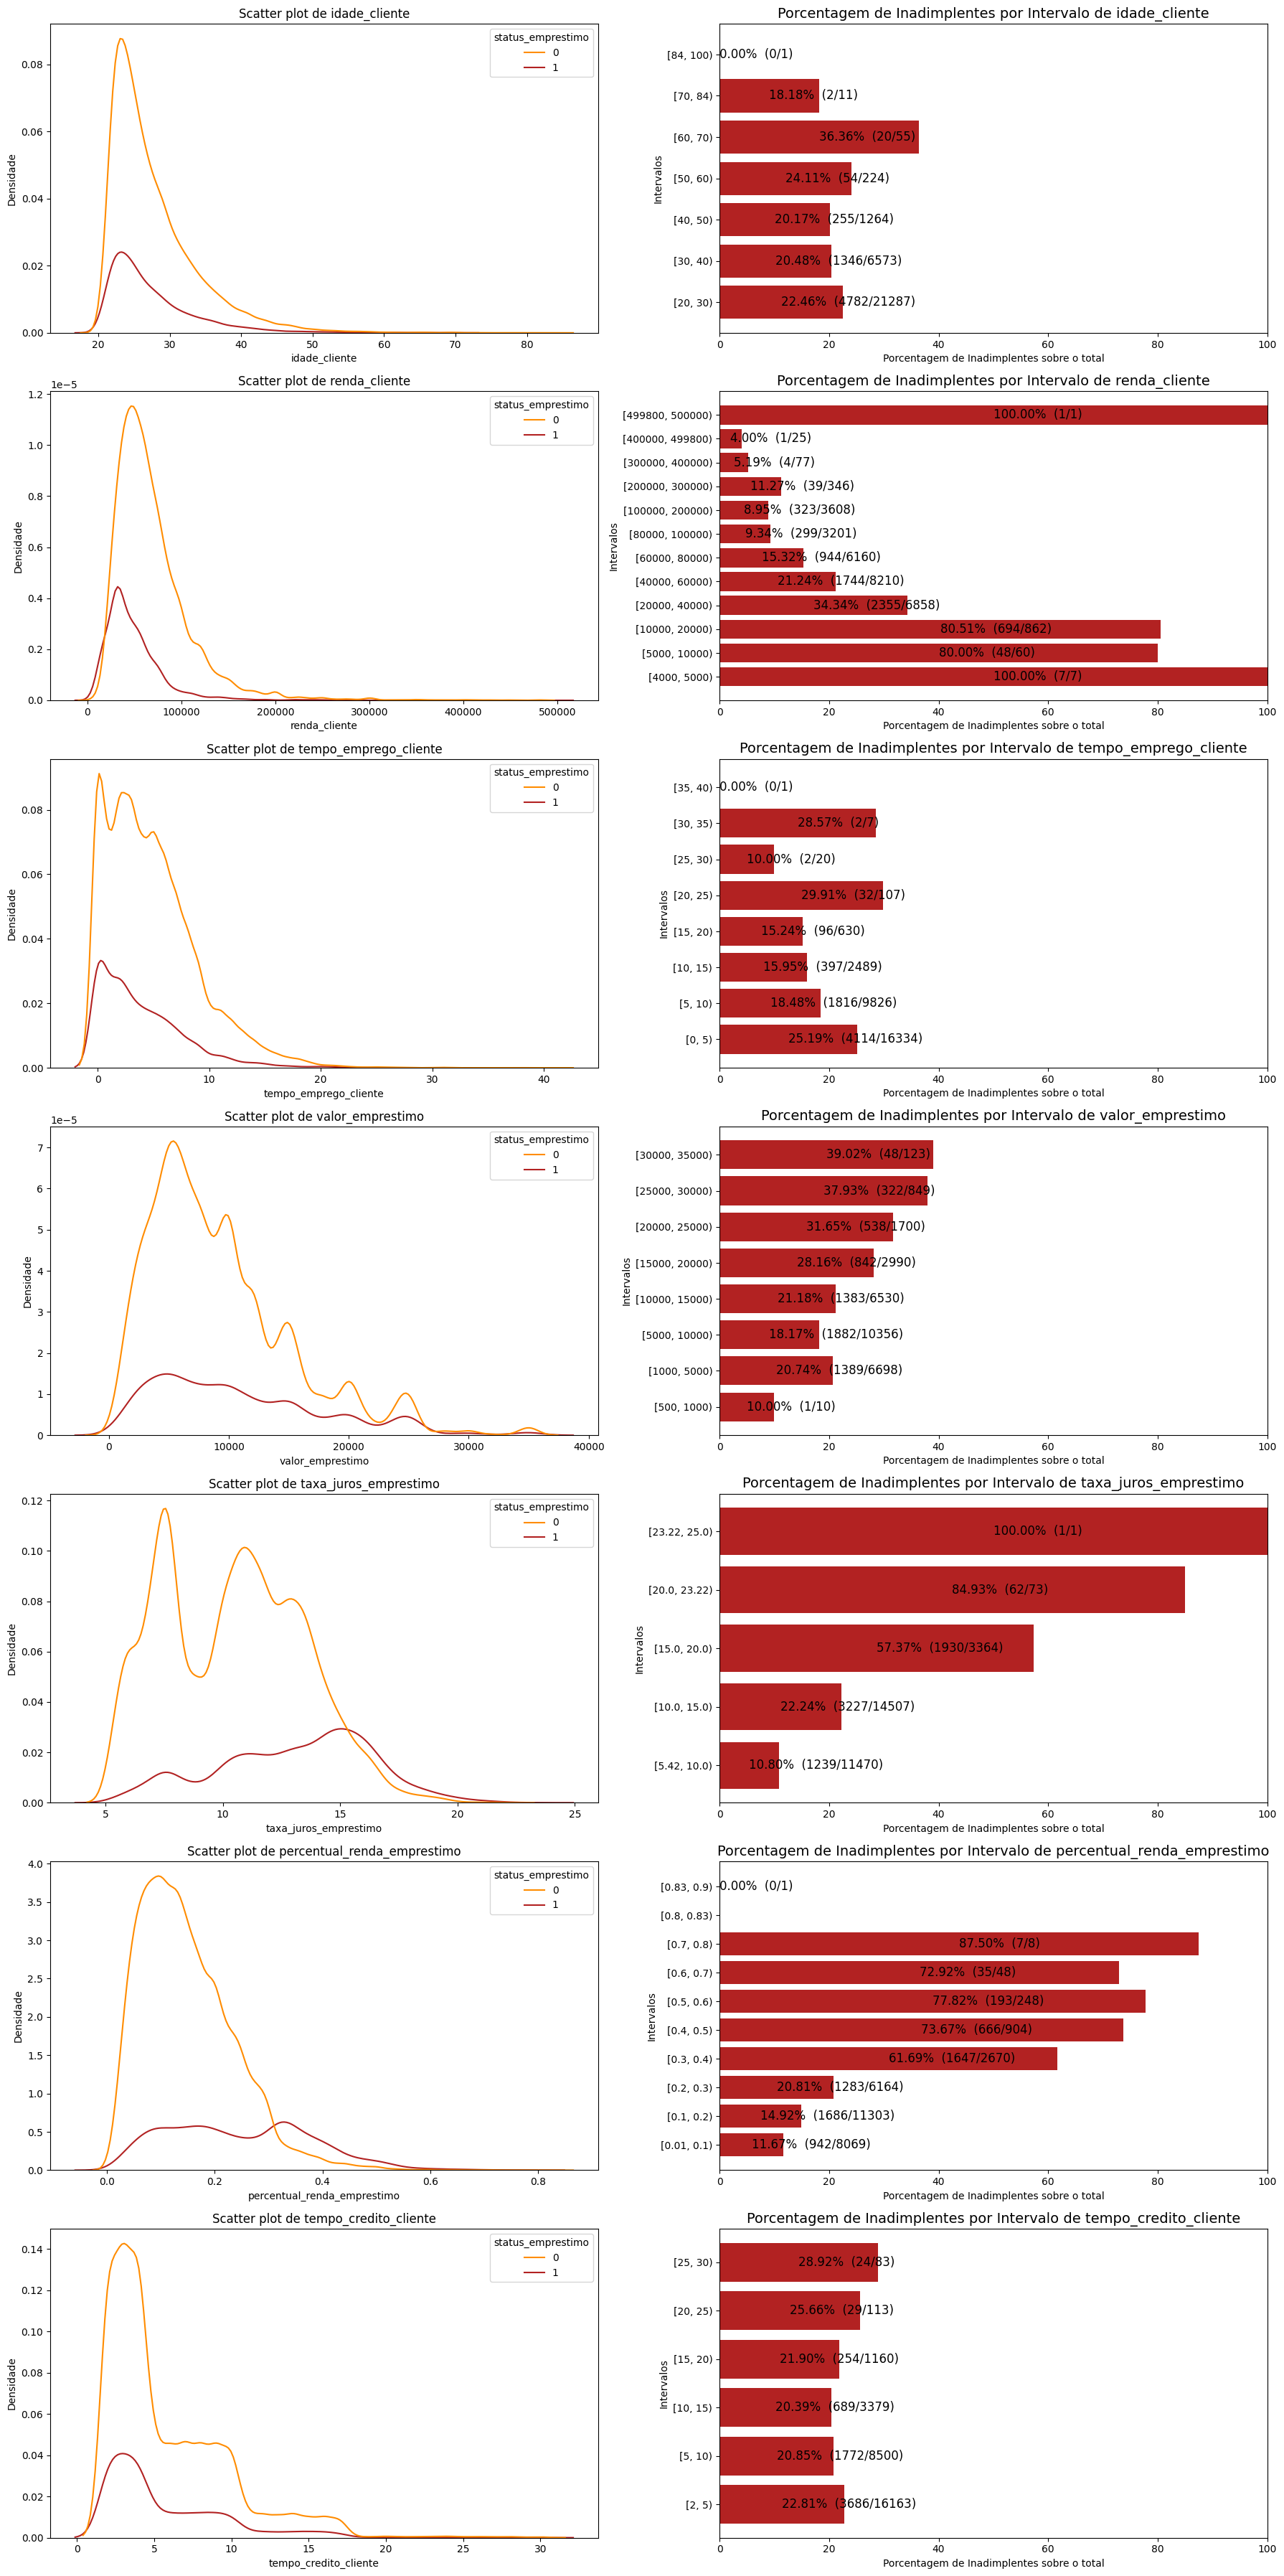

In [130]:
# definindo intervalos para criar colunas no dataset e analisar as variáveis numéricas com base neles
bins_dict = {
    'idade_cliente': [20, 30, 40, 50, 60, 70, 100],
    'renda_cliente': [0, 1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000, 200000, 300000, 400000, 500000],
    'tempo_emprego_cliente': [0, 5, 10, 15, 20, 25, 30, 35, 40],
    'valor_emprestimo': [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000],
    'taxa_juros_emprestimo': [0, 5, 10, 15, 20, 25],
    'percentual_renda_emprestimo': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'tempo_credito_cliente': [0, 5, 10, 15, 20, 25, 30]
    
}
# armazenando porcentagem de ocorrência de inadimplências do intervalo de cada feature numérica
inadimplencia_percentagens = dict()

# Cria uma figura com 7 linhas e 2 colunas de subplots
fig, axes = plt.subplots(7, 2, figsize=(18, 36))

for i, feature in enumerate(features_numericas):
    # ajustando os bins para cobrir todos os valores presentes em em cada feature
    bins = np.sort(np.unique(np.concatenate(([df[feature].min()], bins_dict[feature], [df[feature].max()]))))
    df[f'{feature}_bin'] = pd.cut(df[feature], bins=bins, right=False)
    total_counts = df[f'{feature}_bin'].value_counts().sort_index()
    # filtrando os inadimplentes
    inadimplentes_counts = df[df['status_emprestimo'] == 1][f'{feature}_bin'].value_counts().sort_index().reindex(total_counts.index, fill_value=0)
    # calculando as porcentagens apenas onde há clientes inadimplentes
    porcentagens = (inadimplentes_counts / total_counts) * 100
    inadimplencia_percentagens[feature] = porcentagens
    
    # definindo as posições dos gráficos no subplot
    row = i
    col_0plot, col_1plot = 0, 1
    
    # KDEplot na primeira coluna
    sns.kdeplot(x=df[feature], data=df, ax=axes[row, col_0plot], hue='status_emprestimo', palette=colors)
    title_kdeplot = 'Scatter plot de ' + feature
    # definimos o título e rótulo do eixo y dos gráficos KDE
    axes[row, col_0plot].set_title(title_kdeplot)
    axes[row, col_0plot].set_ylabel('Densidade')
    
    # Barplot na segunda coluna
    bars = axes[row, col_1plot].barh(porcentagens.index.astype(str), porcentagens.values, color=paleta_cores_inadimplente)
    # rotulando cada barra dentro do gráfico com a porcentagem de inadimplentes
    # e também entre parênteses: (quantidade de inadimplentes / total instâncias do intervalo)
    for bar, (bin_interval, pct) in zip(bars, porcentagens.items()):
        # obtemos a contagem de inadimplentes para o intervalo
        inadimplentes = inadimplentes_counts.get(bin_interval, 0)  
        # obtemos a contagem total para o intervalo
        total = total_counts.get(bin_interval, 0)
    
        # verificamos se bar.get_width() da barra é finito antes de rotular para evitar mensagem de erro
        if np.isfinite(bar.get_width()):
            axes[row, col_1plot].text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,                                  
                                    f'{pct:.2f}%  ({int(inadimplentes)}/{int(total)})',
                                    va='center', ha='left', fontsize=12)
            
    # definimos o range do eixo x, titulo dos gráficos e rótulos dos dois eixos.
    axes[row, col_1plot].set_xlim(0, 100)
    axes[row, col_1plot].set_title(f'Porcentagem de Inadimplentes por Intervalo de {feature}', fontsize=14)
    axes[row, col_1plot].set_xlabel('Porcentagem de Inadimplentes sobre o total')
    axes[row, col_1plot].set_ylabel('Intervalos')
# exibe a figura
plt.tight_layout()
plt.show();

Algumas conclusões com base nos gráficos após exibirmos as distribuições KDE de todas as variáveis numéricas com base no target (**`status_emprestimo`**) e também verificarmos a participação dos inadimplentes no total de cada intervalo pré-definido.
- **`idade_cliente`**: idade do cliente.
    - Há uma participação relativamente constante dos inadimplentes em todos os intervalos.
    - A maior concentração de inadimplentes está no intervalo entre 20 e 40 anos de idade com 6.128 instâncias.
    - O intervalo com a maior representação de inadimplentes está entre 60 e 70 anos de idade com 36% do total de clientes deste intervalo.
    - Há um cliente com 94 anos de idade classificado como **adimplente**.
- **`renda_cliente`**: renda anual do cliente.
    - A maior concentração de inadimplentes está entre 20 e 80 mil de renda com 5.043 instâncias.
    - Os inadimplentes possuem uma representação majoritária acima de 80% para os intervalos até 20 mil de renda anual.
    - Há um cliente que recebe acima de 499.800 de renda classificado como **inadimplente**.
- **`tempo_emprego_cliente`**: registro em anos de serviço do cliente.
    - A maior concentração de inadimplentes está evidenciado até 15 anos de serviço com 6.327 instâncias.
    - Os intervalos de **0 a 5**, **20 a 25** e **30 a 35 anos**, os inadimplentes representam acima de 25% do total de clientes destes intervalos.
    - Há um cliente com mais de 35 anos de serviço classificado como **adimplente**.
- **`valor_emprestimo`**: valor recebido pelo interessado.
    - A maior concentração de inadimplentes se encontra entre mil e 20 mil do valor do empréstimo com 5.496 instâncias.
    - Os inadimplentes possuem uma representação de aproximadamente 34% nos intervalos acima de 20 mil do valor do empréstimo.
- **`taxa_juros_emprestimo`**: juros anual do empréstimo.
    - A maior concentração de inadimplentes ocorre até 20% de juros com 6.396 instâncias.
    - Em 15% de juros e acima a representatividade de inadimplentes é superior à 50% em cada intervalo.
    - Há um cliente classificado como **inadimplente** com aproximadamente 23.22% de juros anual.
- **`percentual_renda_emprestimo`**: Porcentagem -> razão do empréstimo sobre a renda.
    - A maior concentração de inadimplentes está nos primeiros intervalos entre 10% e 40% do empréstimo sobre a renda com 5.558 instâncias.
    - Como mostra o gráfico de KDE, há uma representatividade majoritária de inadimplentes dentro dos intervalos acima de 30%, somam aproximadamente 66% do total de clientes destes intervalos.
    - Há um cliente classificado como **adimplente** que possui aproximadamente 83% da razão do empréstimo sobre a renda.
- **`tempo_credito_cliente`:** história de crédito do cliente em anos.
    - A maior concentração de inadimplentes aparece nos intervalos entre 2 e 15 anos de tempo de crédito com 6.147 instâncias.
    - Há uma participação relativamente constante dos inadimplentes em todos os intervalos.
    - Os inadimplentes possuem uma representação de 27% nos intervalos com tempo de crédito registrado acima de 20 anos.

##### Variáveis Categóricas

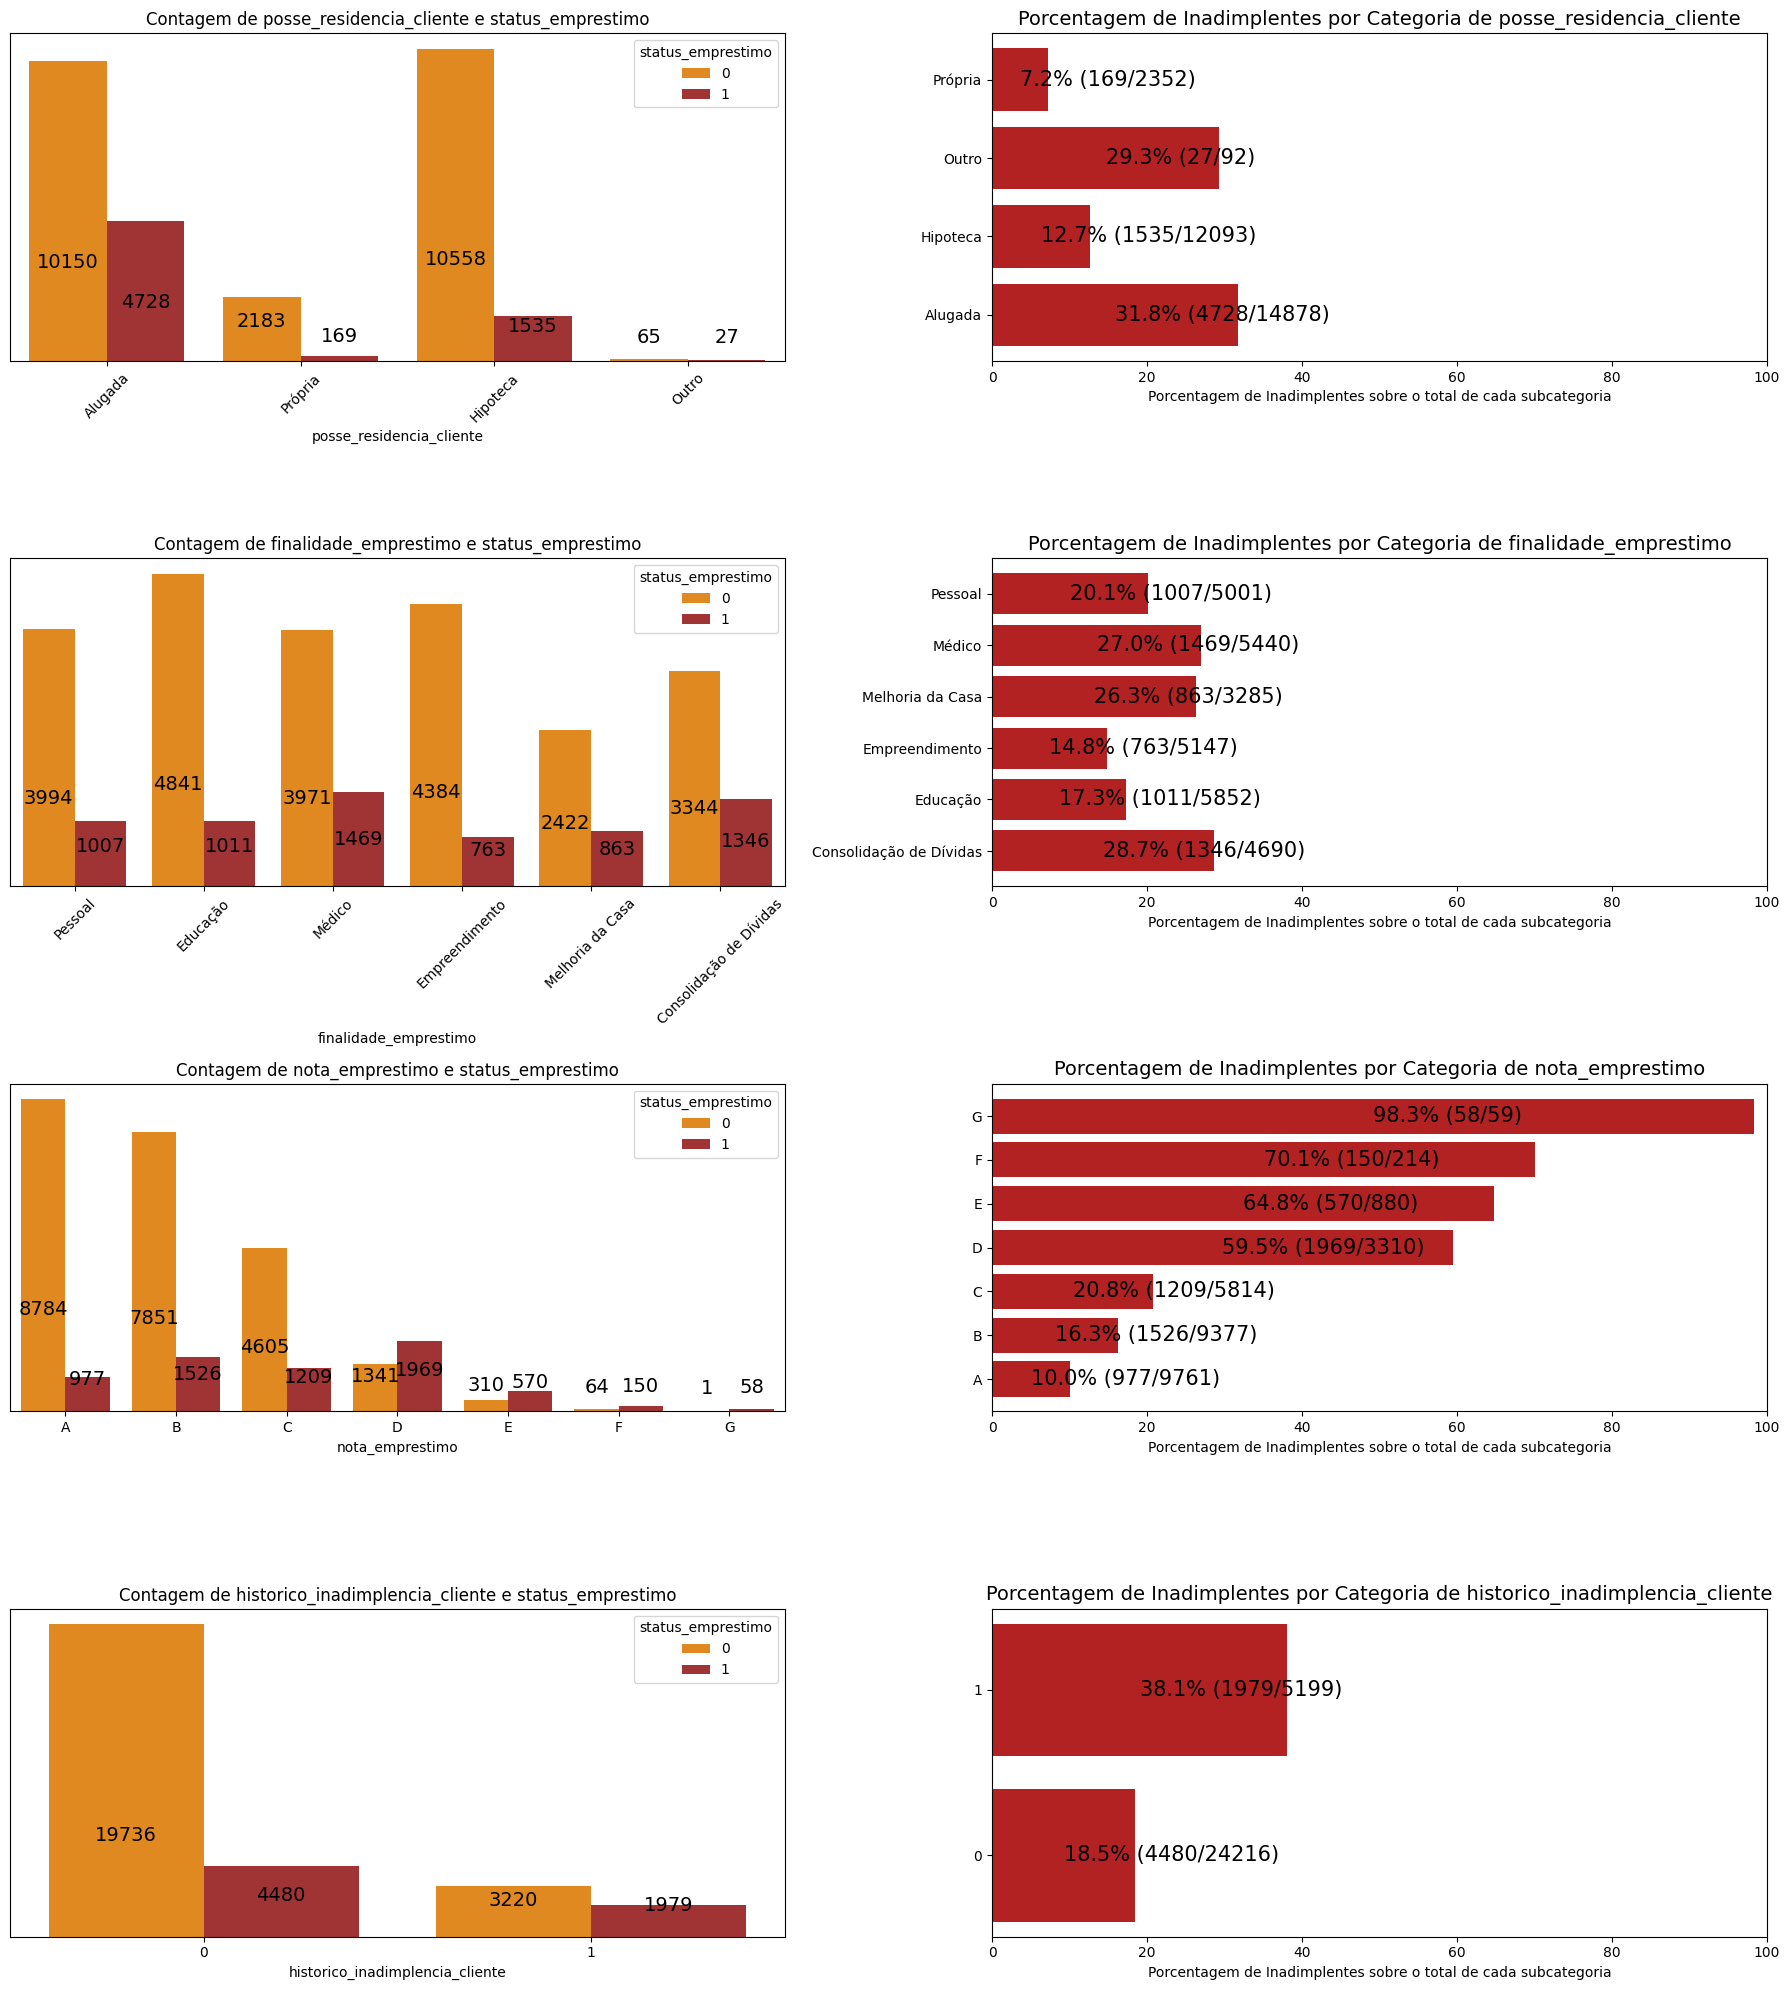

In [131]:
# repetimos o processo de análise das variáveis numéricas, nas categóricas
inadimplencia_percentagens = dict()    

fig, axes = plt.subplots(4, 2, figsize=(18, 20))

for i, feature in enumerate(features_categoricas):
    row_countplot = 2 * i // 2
    col_countplot = 2 * i % 2
    row_barh = (2 * i + 1) // 2
    col_barh = (2 * i + 1) % 2
    
    # Contagem de plots
    plt.subplot(4, 2, 2 * i + 1)
    if feature == 'nota_emprestimo':
        order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Ordem específica para nota_emprestimo
        # gráfico de barras da primeira coluna
        bars = sns.countplot(x=feature, data=df, hue='status_emprestimo', palette=colors, order=order)
    else:
        bars = sns.countplot(x=feature, data=df, hue='status_emprestimo', palette=colors)
    # retirando rótulos do eixo Y
    plt.yticks([])
    plt.ylabel('')
    plt.title(f"Contagem de {feature} e status_emprestimo", fontsize=12)
    # rotacionando rótulos grandes
    if feature in ['posse_residencia_cliente', 'finalidade_emprestimo']:
        plt.xticks(rotation=45)
        
    # Adicionando anotações nas barras da primeira coluna
    for p in bars.patches:
        height = p.get_height()
        if height > 0:
            bars.annotate(format(height, '.0f'), 
                          (p.get_x() + p.get_width() / 2., height/4.), 
                          ha = 'center', va = 'bottom', fontsize=14,
                          xytext = (0, 10), 
                          textcoords = 'offset points')
    
    # Porcentagem de inadimplentes em gráficos de barras horizontais
    ax = axes[row_barh, col_barh]
    
    total_counts = df[feature].value_counts().sort_index()
    inadimplentes_counts = df[df['status_emprestimo'] == 1][feature].value_counts().sort_index()
    percentagens = (inadimplentes_counts / total_counts) * 100
    inadimplencia_percentagens[feature] = percentagens
    percentagens = inadimplencia_percentagens[feature]
    
    # gráfico de barras da segunda coluna
    bars = ax.barh(percentagens.index.astype(str), percentagens.values, color=paleta_cores_inadimplente)
    
    # adicionando rótulos nas barras da segunda coluna
    for bar, pct, inadimplentes, total in zip(bars, percentagens.values, inadimplentes_counts.values, total_counts.values):
        ax.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, f'{pct:.1f}% ({inadimplentes}/{total})', 
                va='center', ha='left', fontsize=15)
    # definindo o range do eixo X de porcentagem de 0 a 100
    ax.set_xlim(0, 100)
    # definindo o titulo e rótulo do eixo X para cada gráfico
    ax.set_title(f'Porcentagem de Inadimplentes por Categoria de {feature}', fontsize=14)
    ax.set_xlabel('Porcentagem de Inadimplentes sobre o total de cada subcategoria')
# exibindo a figura
plt.tight_layout()
plt.show()

De acordo com os gráficos de contagem e a respectiva participação dos inadimplentes no total de cada subcategoria, podemos concluir que:
- **`posse_residencia_cliente`**:
    - Os inadimplentes na maioria das vezes possuem **hipoteca ou moradia alugada**, representando 6.263 instâncias.
    - Inadimplentes representam 29% ou mais quando possuem **moradia alugada ou outra forma de posse**.
- **`finalidade_emprestimo`**:
    - As finalidades 'Consolidação de Dívidas', 'Médico', 'Pessoal' e 'Educação' possuem a maior concentração de inadimplentes com 4.833 instâncias.
    - Os inadimplentes possuem uma representação acima de 25% nas finalidades 'Melhoria da Casa', 'Consolidação de Dívidas', 'Médico' com 3.678 instâncias.
- **`nota_emprestimo`**:
    - A maior concentração de inadimplentes se encontra nas notas 'A', 'B', 'C' e 'D' com 5.681 instâncias.
    - Inadimplentes possuem uma representatividade majoritária nas notas 'D', 'E', 'F' e 'G', com porcentagens acima de 50%, estes clientes representam 2.747 instâncias.
    - Especial atenção na nota de empréstimo 'G' que possui 58 clientes inadimplentes representando aproximadamente 99% da subcategoria.
- **`historico_inadimplencia_cliente`**:
    - A maior concentração de inadimplentes não possui histórico de inadimplência com 4.480 instâncias (18.5% do total de clientes **sem** histórico de inadimplência).
    - Os inadimplentes representam 38.1% do total de clientes **com** histórico de inadimplência com 1.979 instâncias.

### Exportação da base de dados para executar em outro arquivo o devido tratamento de dados visando modelagem

In [132]:
# lista com todas as colunas de df
todas_cols = df.columns.tolist()

# seleciona todas as que foram criadas (bins)
dropar_cols = [col for col in todas_cols if col.endswith('_bin')]

# exclui as colunas selecionadas
df.drop(columns=dropar_cols, inplace=True)

# reinicia o index
df.reset_index(drop=True, inplace=True)

Retiramos os rótulos de intervalos (bins) criados para a análise antes de exportar o modelo

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29415 entries, 0 to 29414
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idade_cliente                    29415 non-null  int16  
 1   renda_cliente                    29415 non-null  int64  
 2   posse_residencia_cliente         29415 non-null  object 
 3   tempo_emprego_cliente            29415 non-null  int16  
 4   finalidade_emprestimo            29415 non-null  object 
 5   nota_emprestimo                  29415 non-null  object 
 6   valor_emprestimo                 29415 non-null  int64  
 7   taxa_juros_emprestimo            29415 non-null  float32
 8   percentual_renda_emprestimo      29415 non-null  float32
 9   historico_inadimplencia_cliente  29415 non-null  int16  
 10  tempo_credito_cliente            29415 non-null  int16  
 11  status_emprestimo                29415 non-null  int16  
dtypes: float32(2), int

In [134]:
with open('EDA_df.pkl', mode='wb') as f:
    pickle.dump(df, f)